#Cataract Eye Detection using image processing with Google Colab

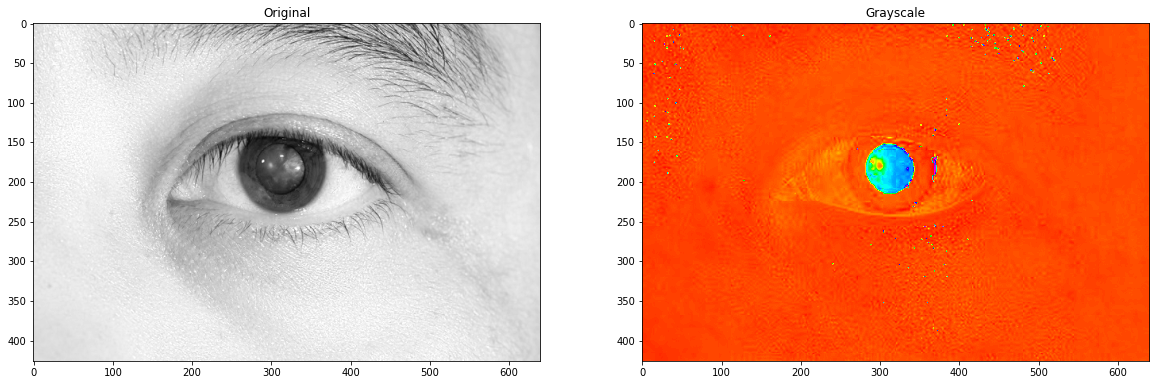

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2hsv

rgb_img = io.imread('katarak kortikal.jpg')
hsv_img = rgb2hsv(rgb_img)

original_img = hsv_img[:, :, 2]  
grayscale_img = hsv_img[:, :, 0] 

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 20))

ax0.imshow(original_img, cmap='gray')  
ax0.set_title("Original")
ax1.imshow(grayscale_img, cmap='hsv')  
ax1.set_title("Grayscale")

plt.show()

Kode di atas merupakan implementasi deteksi mata katarak menggunakan pengolahan citra digital. Algoritma ini didasarkan pada konversi citra dari skala warna RGB menjadi skala warna HSV (hue, saturation, value), dan kemudian memilih layer value sebagai citra asli dan layer hue sebagai citra grayscale.

Langkah pertama dalam kode adalah membaca gambar mata katarak yang telah diunggah dan disimpan sebagai gambar RGB menggunakan io.imread() dari skimage. Gambar RGB kemudian dikonversi menjadi citra HSV menggunakan rgb2hsv() dari skimage.color.

Setelah citra RGB dikonversi menjadi citra HSV, original_img dan grayscale_img didefinisikan sebagai matriks numpy dua dimensi dari layer value dan hue, masing-masing, menggunakan indexing pada hsv_img. original_img merepresentasikan citra asli mata katarak dalam skala keabuan, sedangkan grayscale_img merepresentasikan citra grayscale mata katarak dengan hue sebagai saluran warna.

Kemudian, citra asli dan citra grayscale ditampilkan secara bersamaan pada satu window plot menggunakan matplotlib.pyplot dan subplots(). ax0 dan ax1 merepresentasikan dua sumbu atau axis dalam satu window plot. ax0.imshow() dan ax1.imshow() menampilkan citra asli dan grayscale secara bergantian pada sumbu pertama dan kedua, masing-masing, menggunakan imshow().

Terakhir, dengan menggunakan set_title(), setiap citra diberikan judul yang sesuai. plt.show() menampilkan plot yang telah dibuat.

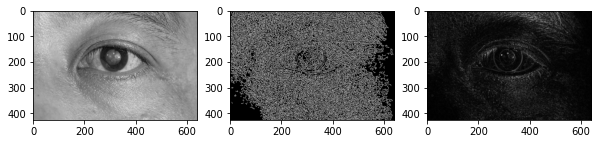

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters, io
import cv2

rgb_img = io.imread('katarak kortikal.jpg')
hsv_img = rgb2hsv(rgb_img)

img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2GRAY)
imgC = cv2.Canny(img, 20, 40)

imgR = filters.roberts(img)
imgP = filters.prewitt(img)

fig, ax = plt.subplots(1, 3, figsize=(10, 8))
ax[0].imshow(img, cmap='gray')
ax[1].imshow(imgC, cmap='gray')
ax[2].imshow(imgP, cmap='gray')

Kode di atas juga merupakan implementasi deteksi mata katarak menggunakan pengolahan citra digital. Algoritma ini menggunakan beberapa teknik pemrosesan citra seperti konversi citra RGB ke grayscale, deteksi tepi dengan algoritma Canny, dan deteksi tepi dengan algoritma Roberts dan Prewitt.

Langkah pertama adalah membaca gambar mata katarak yang telah diunggah dan disimpan sebagai gambar RGB menggunakan io.imread() dari skimage. Kemudian, gambar RGB dikonversi menjadi citra HSV menggunakan rgb2hsv() dari skimage.color.

Selanjutnya, citra RGB diubah menjadi citra grayscale menggunakan cv2.cvtColor() dari OpenCV dengan memilih mode COLOR_BGR2GRAY. Setelah itu, citra grayscale diolah dengan menggunakan algoritma deteksi tepi Canny dan hasilnya disimpan dalam variabel imgC menggunakan cv2.Canny().

Selanjutnya, dilakukan deteksi tepi menggunakan algoritma Roberts dan Prewitt, dan hasilnya disimpan masing-masing dalam variabel imgR dan imgP menggunakan fungsi filters.roberts() dan filters.prewitt() dari skimage.

Terakhir, citra grayscale dan hasil pemrosesan citra diplot dalam satu window menggunakan matplotlib.pyplot dengan subplots(). Tiga sumbu atau axis ditetapkan dengan ax[0], ax[1], dan ax[2]. Citra grayscale ditampilkan pada sumbu pertama, hasil deteksi tepi dengan algoritma Canny pada sumbu kedua, dan hasil deteksi tepi dengan algoritma Roberts dan Prewitt pada sumbu ketiga.

Setiap citra diberikan colormap gray menggunakan cmap='gray'. Ukuran plot ditetapkan dengan figsize=(10,8).

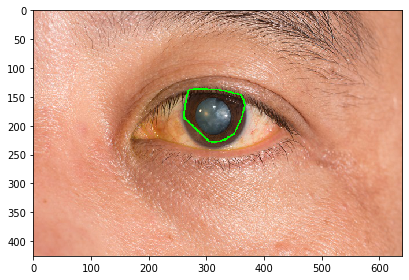

In [58]:
import cv2
import numpy as np
from skimage import io

rgb_img = io.imread('katarak kortikal.jpg')
gray_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray_img, 45, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
n = len(contours)-1
contours = sorted(contours, key=cv2.contourArea, reverse=False)[:n]
for c in contours:
    hull = cv2.convexHull(c)
cv2.drawContours(rgb_img, [hull], 0, (0, 255, 0), 2)
io.imshow(rgb_img)
io.show()

Kode di atas merupakan implementasi deteksi katarak pada mata menggunakan citra digital. Algoritma ini menggunakan beberapa teknik pemrosesan citra seperti konversi citra RGB ke grayscale, thresholding, ekstraksi kontur, dan ekstraksi convex hull.

Pertama-tama, citra RGB mata katarak diunggah dan disimpan dalam variabel rgb_img menggunakan io.imread() dari skimage. Kemudian, citra RGB diubah menjadi citra grayscale menggunakan cv2.cvtColor() dari OpenCV dengan memilih mode COLOR_BGR2GRAY. Hasilnya disimpan dalam variabel gray_img.

Selanjutnya, dilakukan thresholding menggunakan cv2.threshold(). Nilai threshold adalah 45, nilai pixel di bawah threshold akan menjadi 0, dan nilai pixel di atas threshold akan menjadi 255. Hasil thresholding disimpan dalam variabel thresh.

Selanjutnya, dilakukan ekstraksi kontur menggunakan cv2.findContours(). Mode cv2.RETR_EXTERNAL digunakan untuk mendapatkan kontur terluar saja, dan mode cv2.CHAIN_APPROX_NONE digunakan untuk menyimpan semua titik kontur. Hasilnya disimpan dalam variabel contours dan hierarchy.

Selanjutnya, variabel n dihitung sebagai jumlah kontur yang ditemukan dikurangi 1. Kontur-kontur yang ditemukan kemudian diurutkan berdasarkan luas kontur menggunakan sorted() dan cv2.contourArea(), dan hanya kontur dengan luas terbesar yang dipertahankan.

Terakhir, dilakukan ekstraksi convex hull dari setiap kontur menggunakan cv2.convexHull(). Hasil ekstraksi convex hull digunakan untuk menggambar garis pada kontur katarak dengan fungsi cv2.drawContours(). Hasil akhirnya ditampilkan dalam bentuk citra RGB yang telah dimodifikasi.

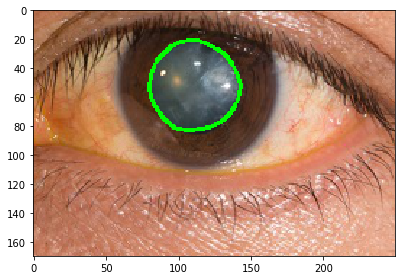

In [48]:
import cv2
import numpy as np
from skimage import io

rgb_img = io.imread('katarak kortikal.jpg')[130:300, 200:450]
gray_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray_img, 55, 255, 60)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
n=len(contours)-1
contours=sorted(contours,key=cv2.contourArea,reverse=False)[:n]
                
for c in contours:
    hull = cv2.convexHull(c)
cv2.drawContours(rgb_img, [hull], 0, (0,255,0),2)
io.imshow(rgb_img)
io.show()

Penjelasan dari kode diatas:

* Mengimpor beberapa modul/library yang dibutuhkan, yaitu cv2, numpy, dan skimage.
* Membaca sebuah file gambar (dalam format RGB) yang disimpan dalam direktori lokal menggunakan fungsi io.imread dari modul skimage. Hanya bagian tertentu dari gambar yang dipilih dan dipotong menggunakan slicing pada baris ini: rgb_img = io.imread('katarak kortikal.jpg')[130:300, 200:450].
* Mengubah gambar RGB menjadi citra grayscale menggunakan fungsi cv2.cvtColor dari modul cv2.
* Melakukan proses thresholding pada citra grayscale menggunakan fungsi cv2.threshold untuk menghasilkan citra biner. Parameter-parameter yang digunakan dalam fungsi ini adalah nilai threshold, nilai maksimum, dan tipe thresholding.
* Menggunakan fungsi cv2.findContours untuk menemukan kontur pada citra biner yang dihasilkan sebelumnya. Parameter-parameter yang digunakan dalam fungsi ini adalah citra biner, mode kontur, dan metode pendekatan kontur.
* Menyortir kontur berdasarkan luas kontur dan memilih sejumlah besar kontur dengan luas terbesar. Kontur disortir menggunakan fungsi bawaan Python sorted dan dimasukkan dalam variabel contours.
* Melakukan convex hull pada setiap kontur yang dipilih menggunakan fungsi cv2.convexHull.
* Menggambar kontur hasil convex hull pada gambar asli menggunakan fungsi cv2.drawContours. Titik-titik yang membentuk kontur diwarnai dengan warna hijau dan ketebalan garisnya adalah 2.
* Menampilkan gambar hasil proses pada layar menggunakan fungsi io.imshow dan io.show.

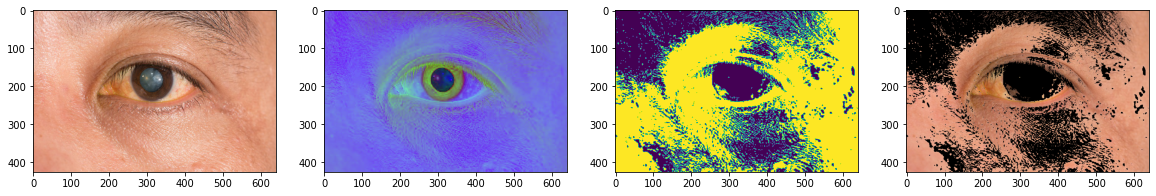

In [49]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io

rgb_img = io.imread('katarak kortikal.jpg')
grid_HSV = cv2.cvtColor(rgb_img,cv2.COLOR_BGR2HSV)

lower = np.array([0,100,100])
upper = np.array([255,255,255])

mask = cv2.inRange(grid_HSV, lower, upper)
res = cv2.bitwise_and(rgb_img, rgb_img, mask=mask)

fig, ax = plt.subplots(1,4, figsize = (20,8))
ax[0].imshow(rgb_img)
ax[1].imshow(grid_HSV)
ax[2].imshow(mask)
ax[3].imshow(res)

plt.show()

Penjelasan dari kode diatas:

* Mengimpor beberapa modul/library yang dibutuhkan, yaitu numpy, cv2, matplotlib, dan skimage.
* Membaca sebuah file gambar (dalam format RGB) yang disimpan dalam direktori lokal menggunakan fungsi io.imread dari modul skimage.
* Mengubah gambar RGB menjadi citra dalam ruang warna HSV menggunakan fungsi cv2.cvtColor dari modul cv2.
* Menentukan nilai batas bawah dan atas dalam ruang warna HSV yang akan dijadikan sebagai batas filter. Dalam kasus ini, nilai batas bawah diatur menjadi [0,100,100] dan nilai batas atas diatur menjadi [255,255,255].
* Menggunakan fungsi cv2.inRange untuk membuat sebuah mask yang akan digunakan untuk menghilangkan bagian dari gambar yang tidak memenuhi kriteria filter (yaitu memiliki nilai pixel di antara batas bawah dan atas). Hasilnya adalah citra biner.
* Menggunakan fungsi cv2.bitwise_and untuk memfilter gambar asli (dalam format RGB) menggunakan mask yang sudah dibuat pada langkah sebelumnya. Hasilnya adalah gambar dalam format RGB yang hanya memuat bagian-bagian yang memenuhi kriteria filter.
* Membuat sebuah figure matplotlib dan beberapa subplot (dalam kasus ini 4) dengan ukuran yang sudah ditentukan menggunakan fungsi subplots.
* Menampilkan gambar asli, citra dalam ruang warna HSV, mask, dan hasil filter pada masing-masing subplot menggunakan fungsi imshow.
* Menampilkan figure matplotlib pada layar menggunakan fungsi plt.show().

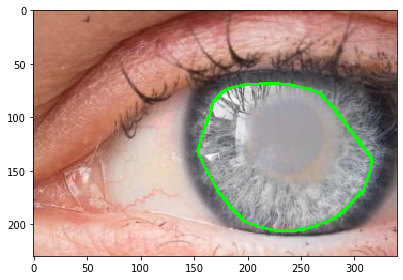

In [90]:
import cv2
import numpy as np
from skimage import io

rgb_img = io.imread('katarak.jpg')[220:450, 200:540]
gray_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray_img, 67, 250, 20)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
n=len(contours)-1
contours=sorted(contours,key=cv2.contourArea,reverse=False)[:n]
                
for c in contours:
    hull = cv2.convexHull(c)
cv2.drawContours(rgb_img, [hull], 0, (0,255,0),2)
io.imshow(rgb_img)
io.show()

Kode di atas merupakan program untuk mendeteksi dan menggambar kontur objek pada gambar dengan Python, menggunakan beberapa library yaitu cv2 (OpenCV), numpy, dan skimage. Berikut adalah penjelasan dari setiap baris kode:

* Import library cv2 untuk pemrosesan citra dan numpy untuk manipulasi array, serta io dari skimage untuk membaca gambar.
* Membaca gambar dengan nama file 'katarak.jpg', kemudian memotong gambar dengan mengambil area gambar dari baris ke-220 hingga 450 dan kolom dari ke-200 hingga 540. Hasilnya disimpan di variabel rgb_img.
* Mengubah gambar dari mode RGB menjadi grayscale menggunakan fungsi cv2.cvtColor.
* Membuat threshold pada gambar grayscale menggunakan fungsi cv2.threshold dengan parameter nilai ambang (67), nilai maksimum (250), dan jenis threshold (20).
* Mencari kontur pada gambar biner menggunakan fungsi cv2.findContours dengan mode RETR_LIST dan metode CHAIN_APPROX_NONE. Hasilnya disimpan di variabel contours dan hierarchy.
* Menghitung jumlah kontur dan menyimpannya di variabel n.
* Mengurutkan kontur berdasarkan luas dengan fungsi sorted, kemudian memilih n-1 kontur dengan luas terbesar.
* Menggambar kontur dengan fungsi cv2.convexHull dan cv2.drawContours untuk membuat outline pada gambar awal.
* Menampilkan gambar dengan io.imshow dan io.show.

Dengan demikian, kode tersebut dapat mendeteksi dan menggambar kontur objek pada gambar dengan efektif.

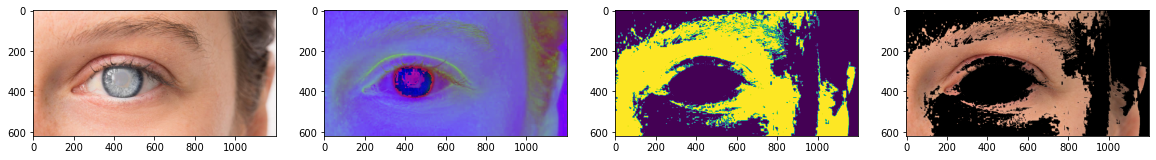

In [92]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io

rgb_img = io.imread('katarak.jpg')
grid_HSV = cv2.cvtColor(rgb_img,cv2.COLOR_BGR2HSV)

lower = np.array([0,100,100])
upper = np.array([400,255,255])

mask = cv2.inRange(grid_HSV, lower, upper)
res = cv2.bitwise_and(rgb_img, rgb_img, mask=mask)

fig, ax = plt.subplots(1,4, figsize = (20,8))
ax[0].imshow(rgb_img)
ax[1].imshow(grid_HSV)
ax[2].imshow(mask)
ax[3].imshow(res)

plt.show()

Kode di atas merupakan program untuk melakukan segmentasi warna pada gambar dengan Python, menggunakan beberapa library yaitu numpy, cv2 (OpenCV), matplotlib, dan skimage. Berikut adalah penjelasan dari setiap baris kode:

* Import library numpy untuk manipulasi array, cv2 untuk pemrosesan citra, matplotlib untuk plotting gambar, dan io dari skimage untuk membaca gambar.
* Membaca gambar dengan nama file 'katarak.jpg' menggunakan io.imread dan menyimpannya di variabel rgb_img.
* Mengubah mode warna gambar dari RGB ke HSV menggunakan fungsi cv2.cvtColor.
* Menentukan range warna yang ingin disegmentasi dengan lower dan upper. Pada kasus ini, range warna yang ditentukan adalah 0-400 untuk channel hue, 100-255 untuk channel saturation, dan 100-255 untuk channel value.
* Membuat mask yang merepresentasikan area di mana warna pada gambar asli berada dalam range warna yang telah ditentukan dengan menggunakan fungsi cv2.inRange.
* Membuat hasil segmentasi warna pada gambar asli dengan mengaplikasikan mask pada gambar asli menggunakan fungsi cv2.bitwise_and dan menyimpannya di variabel res.
* Membuat 4 subplot pada sebuah figure dengan ukuran 20x8, dan menampilkan gambar-gambar yang telah diproses pada masing-masing subplot menggunakan fungsi plt.imshow.
* Menampilkan figure dengan menggunakan fungsi plt.show.

Dengan demikian, kode tersebut dapat melakukan segmentasi warna pada gambar dengan efektif dan menampilkan hasil segmentasi tersebut pada sebuah plot yang terdiri dari beberapa gambar.